# 네이버 검색어 트랜드 수집

<AxesSubplot:>

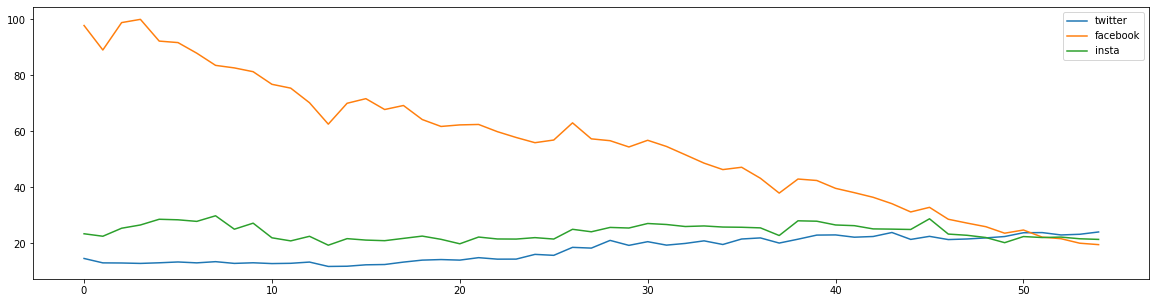

In [34]:
import requests as rs
import pandas as pd
import json

# 1. application key 등록
CLIENT_ID = "3IggRLfWgbei77lDntce"  # 강사님거에요
CLIENT_SECRET = "cmsf8eaQPA"

# 2. document : url, params, headers
url = 'https://openapi.naver.com/v1/datalab/search'
params = {"startDate" : "2018-01-01", "endDate" : "2022-07-31", "timeUnit" : "month", "keywordGroups" : [{"groupName" : "트위터", "keywords" : ["트위터" ,"트윗"]}, {"groupName" : "페이스북", "keywords" : ["페이스북" ,"페북"]}, {"groupName" : "인스타그램", "keywords" : ["인스타그램" ,"인스타"]}]}
headers = {"Content-Type" : "application/json", "X-Naver-Client-Id" : CLIENT_ID, "X-Naver-Client-Secret" : CLIENT_SECRET}

# 3. request : response(json) --> JSON(str)
response = rs.post(url, json.dumps(params), headers=headers)
data = response.json()['results']

# 4. JSON(str) --> prepocessing --> DataFrame
df = pd.DataFrame({'date' : [period['period'] for period in data[0]["data"]], 'twitter' : [ratio['ratio'] for ratio in data[0]["data"]], 'facebook' : [ratio['ratio'] for ratio in data[1]["data"]], 'insta' : [ratio['ratio'] for ratio in data[2]["data"]]})

# 5. visualization
df.plot(figsize=(20, 5))

In [25]:
# list comprehension
# 0~9까지 홀수의 제곱을 출력할때
result = [num ** 2 for num in range(10) if num % 2]
print(result)

[1, 9, 25, 49, 81]
